## Query from bigquery

**SELECT**

       a.product_id, 

       b.inventory_item_id, 

       b.status, 

       b.created_at, 

       b.shipped_at,

       b.delivered_at,

       b.returned_at, 

       b.sale_price,

       a.cost,

       a.product_category,

       a.product_name,

       a.product_retail_price,

       a.product_department,

       a.product_distribution_center_id

**FROM** `bigquery-public-data.thelook_ecommerce.inventory_items` **a**

**INNER JOIN** `bigquery-public-data.thelook_ecommerce.order_items` **b**

**ON a.id = b.inventory_item_id**

**WHERE b.shipped_at BETWEEN '2023-01-01' AND '2023-06-30'**

      AND EXTRACT(YEAR FROM b.shipped_at) = 2023

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats

In [98]:
#setting untuk menampilkan seluruh kolom
pd.set_option('display.max_column', None)

## Data Loading

In [3]:
data = pd.read_csv('thelook_ecommerce.csv')
data.head()

,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cost,product_category,product_name,product_retail_price,product_department,product_distribution_center_id
0,16898,12462,Complete,2023-06-04 10:28:11 UTC,2023-06-02 12:42:00 UTC,2023-06-05 09:13:00 UTC,NaN,25.00,13.9250,Tops & Tees,Quiksilver Waterman Men's On The Rise,25.00,Men,3
1,16898,26917,Shipped,2023-03-03 07:13:03 UTC,2023-03-04 06:02:00 UTC,NaN,NaN,25.00,13.9250,Tops & Tees,Quiksilver Waterman Men's On The Rise,25.00,Men,3
2,16898,446551,Shipped,2023-03-10 01:00:59 UTC,2023-03-07 20:49:00 UTC,NaN,NaN,25.00,13.9250,Tops & Tees,Quiksilver Waterman Men's On The Rise,25.00,Men,3
3,25135,278846,Complete,2023-04-20 01:07:31 UTC,2023-04-21 08:24:00 UTC,2023-04-24 06:04:00 UTC,NaN,22.48,12.4764,Socks,Volcom Men's Argyle Socks,22.48,Men,3
4,11843,159130,Shipped,2023-01-16 10:04:23 UTC,2023-01-16 04:23:00 UTC,NaN,NaN,60.00,33.9000,Intimates,Wendy Glez Rose Cami Black,60.00,Women,3


In [4]:
#mencari rentang waktu pada dataset
print(f'tanggal pertama pada data: {data.shipped_at.min()}')
print(f'tanggal terakhir pada data: {data.shipped_at.max()}')


tanggal pertama pada data: 2023-01-01 00:05:00 UTC
tanggal terakhir pada data: 2023-06-11 18:06:00 UTC


dataset ini memiliki rentang waktu antara 2023-01-01 00:05:00 UTC sampai 2023-06-11 18:06:00 UTC

In [5]:
#melihat ukuran pada dataset
data.shape

(40095, 14)

In [6]:
#melihat informasi pada dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40095 entries, 0 to 40094
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      40095 non-null  int64  
 1   inventory_item_id               40095 non-null  int64  
 2   status                          40095 non-null  object 
 3   created_at                      40095 non-null  object 
 4   shipped_at                      40095 non-null  object 
 5   delivered_at                    21403 non-null  object 
 6   returned_at                     6143 non-null   object 
 7   sale_price                      40095 non-null  float64
 8   cost                            40095 non-null  float64
 9   product_category                40095 non-null  object 
 10  product_name                    40092 non-null  object 
 11  product_retail_price            40095 non-null  float64
 12  product_department              

In [7]:
# konversi ke object untuk menghilangkan timezone
data['created_at'] = pd.to_datetime(data['created_at']).dt.tz_localize(None).dt.date
data['shipped_at'] = pd.to_datetime(data['shipped_at']).dt.tz_localize(None).dt.date
data['delivered_at'] = pd.to_datetime(data['delivered_at']).dt.tz_localize(None).dt.date
data['returned_at'] = pd.to_datetime(data['returned_at']).dt.tz_localize(None).dt.date
# konversi ke datetime
data['created_at'] = pd.to_datetime(data['created_at'])
data['shipped_at'] = pd.to_datetime(data['shipped_at'])
data['delivered_at'] = pd.to_datetime(data['delivered_at'])
data['returned_at'] = pd.to_datetime(data['returned_at'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40095 entries, 0 to 40094
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   product_id                      40095 non-null  int64         
 1   inventory_item_id               40095 non-null  int64         
 2   status                          40095 non-null  object        
 3   created_at                      40095 non-null  datetime64[ns]
 4   shipped_at                      40095 non-null  datetime64[ns]
 5   delivered_at                    21403 non-null  datetime64[ns]
 6   returned_at                     6143 non-null   datetime64[ns]
 7   sale_price                      40095 non-null  float64       
 8   cost                            40095 non-null  float64       
 9   product_category                40095 non-null  object        
 10  product_name                    40092 non-null  object        
 11  pr

In [9]:
#mengetahui nilai statistik dari numerical column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,40095.0,15356.849657,8389.028172,1.0000,8106.000000,16137.000000,22576.500000,29120.000000
inventory_item_id,40095.0,244040.778750,142871.088739,6.0000,119595.000000,243064.000000,368655.000000,489103.000000
sale_price,40095.0,59.433747,64.993766,0.0200,24.950001,39.990002,69.949997,999.000000
cost,40095.0,28.588156,30.366857,0.0083,11.384310,19.885581,34.455224,557.151002
product_retail_price,40095.0,59.433747,64.993766,0.0200,24.950001,39.990002,69.949997,999.000000
product_distribution_center_id,40095.0,5.003417,2.893775,1.0000,2.000000,5.000000,8.000000,10.000000


In [10]:
# mencari null values
data.isnull().sum()

product_id                            0
inventory_item_id                     0
status                                0
created_at                            0
shipped_at                            0
delivered_at                      18692
returned_at                       33952
sale_price                            0
cost                                  0
product_category                      0
product_name                          3
product_retail_price                  0
product_department                    0
product_distribution_center_id        0
dtype: int64

In [11]:
# menghapus null values
data = data.dropna(subset=['product_name'])

null value pada kolom product_name akan dihapus karena hanya berjumlah 3 dari 40095 data, sedangkan delivered_at dan returned_at tidak dihapus karena null value ini bisa terjadi karena status pengiriman sedang dalam proses.

In [12]:
data.duplicated().sum()

0

## Exploratory Data Analysis

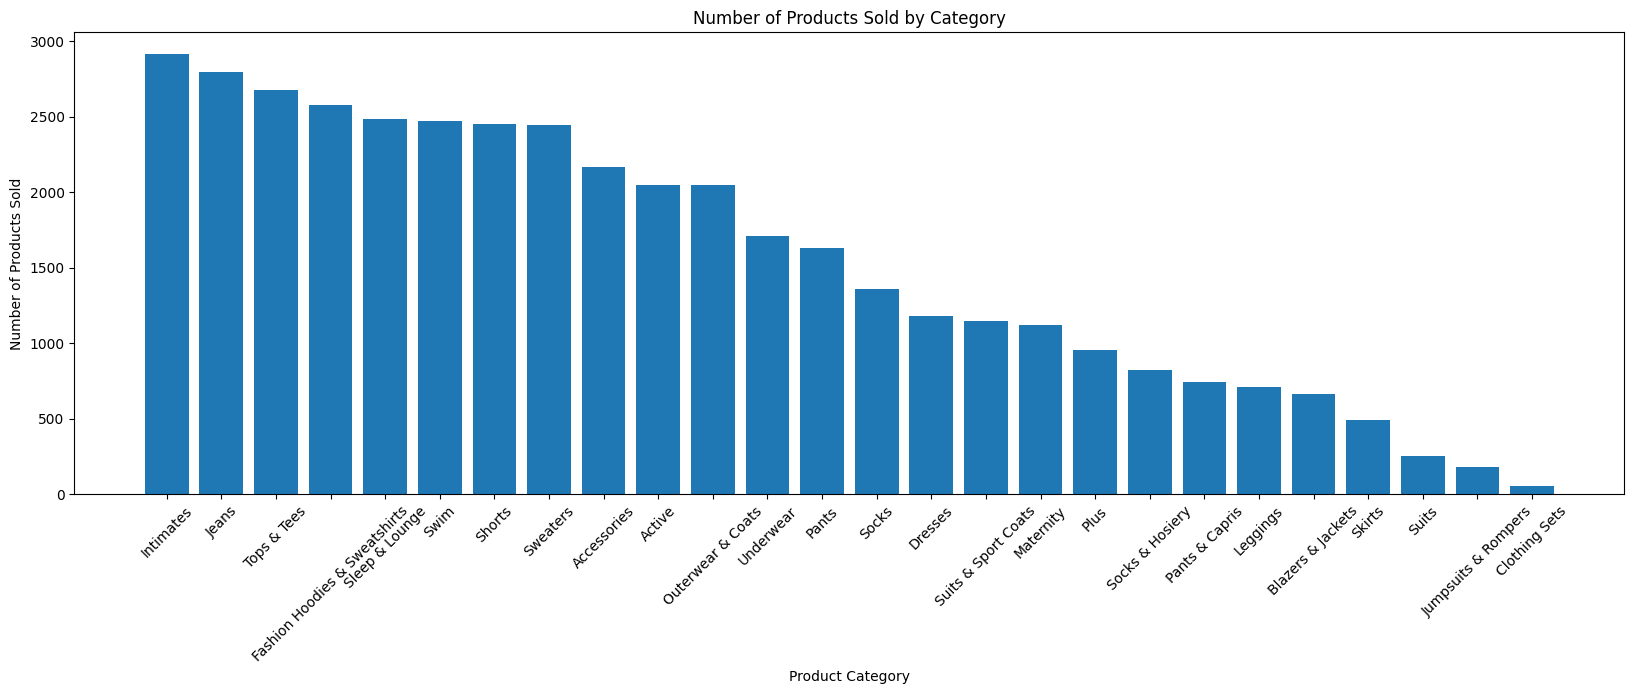

In [13]:
#plot untuk menampilkan jumlah product terjual berdasarkan kategori produk
plt.figure(figsize=(20,6))
plt.bar(data['product_category'].value_counts().index, data['product_category'].value_counts().values)
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Category')
plt.xticks(rotation=45)
plt.show()

Produk yang paling banyak terjual adalah produk dengan kategori Intimates sebanyak 2912, Jeans sebanyak 2795 dan Tops & Tees sebanyak 2674 dan yang terendah adalah Clothing Sets sebanyak 58, Produk-produk seperti Intimates, Tops & Tees, Jeans, Sweaters, Shorts, Swim, dan Fashion Hoodies & Sweatshirts paling banyak dibeli pada bulan Januari hingga Juni tahun 2023 di Amerika Serikat karena faktor-faktor seperti musim semi yang membuat orang mencari pakaian yang lebih ringan, tren mode baru yang dirilis pada awal tahun, adanya perayaan dan liburan seperti Valentine's Day dan St. Patrick's Day, serta perubahan musim dari dingin ke semi yang membutuhkan pakaian seperti Sweaters untuk menjaga kehangatan.

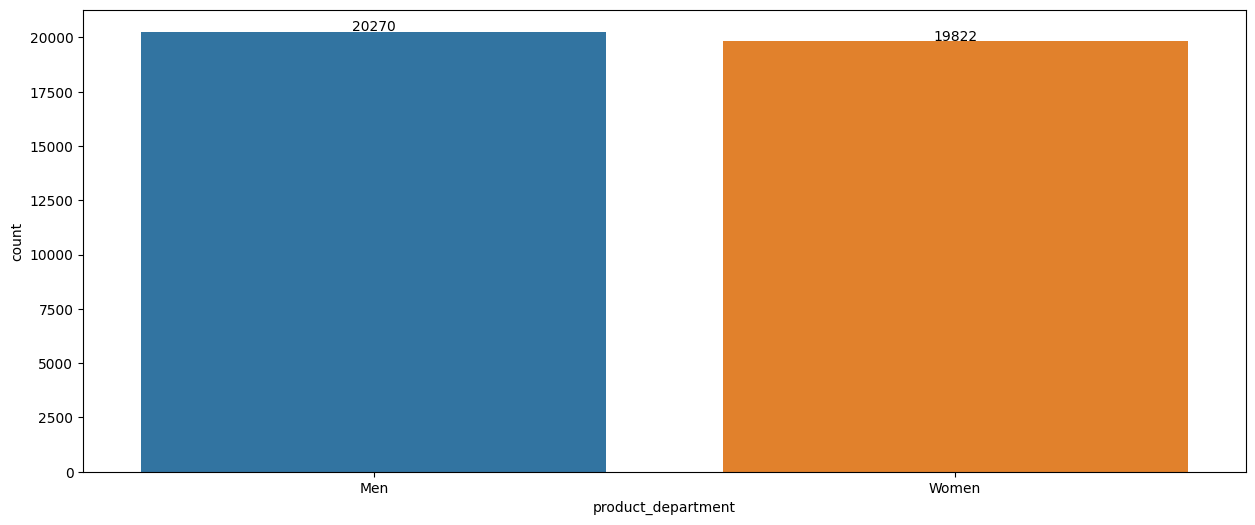

In [14]:
#plot untuk menampilkan jumlah dari masing masing product department
plt.figure(figsize=(15,6))
fig = sns.countplot(x=data.product_department)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")

Pada grafik diatas menunjukan bahwa produk untuk pria lebih banyak dibandingkan produk untuk wanita, dimana produk untuk pria berjumlah 20270 dan produk untuk wanita berjumlah 19822, dilihat dari banyaknya, kedua produk ini hanya memiliki perbedaan jumlah yang sedikit.

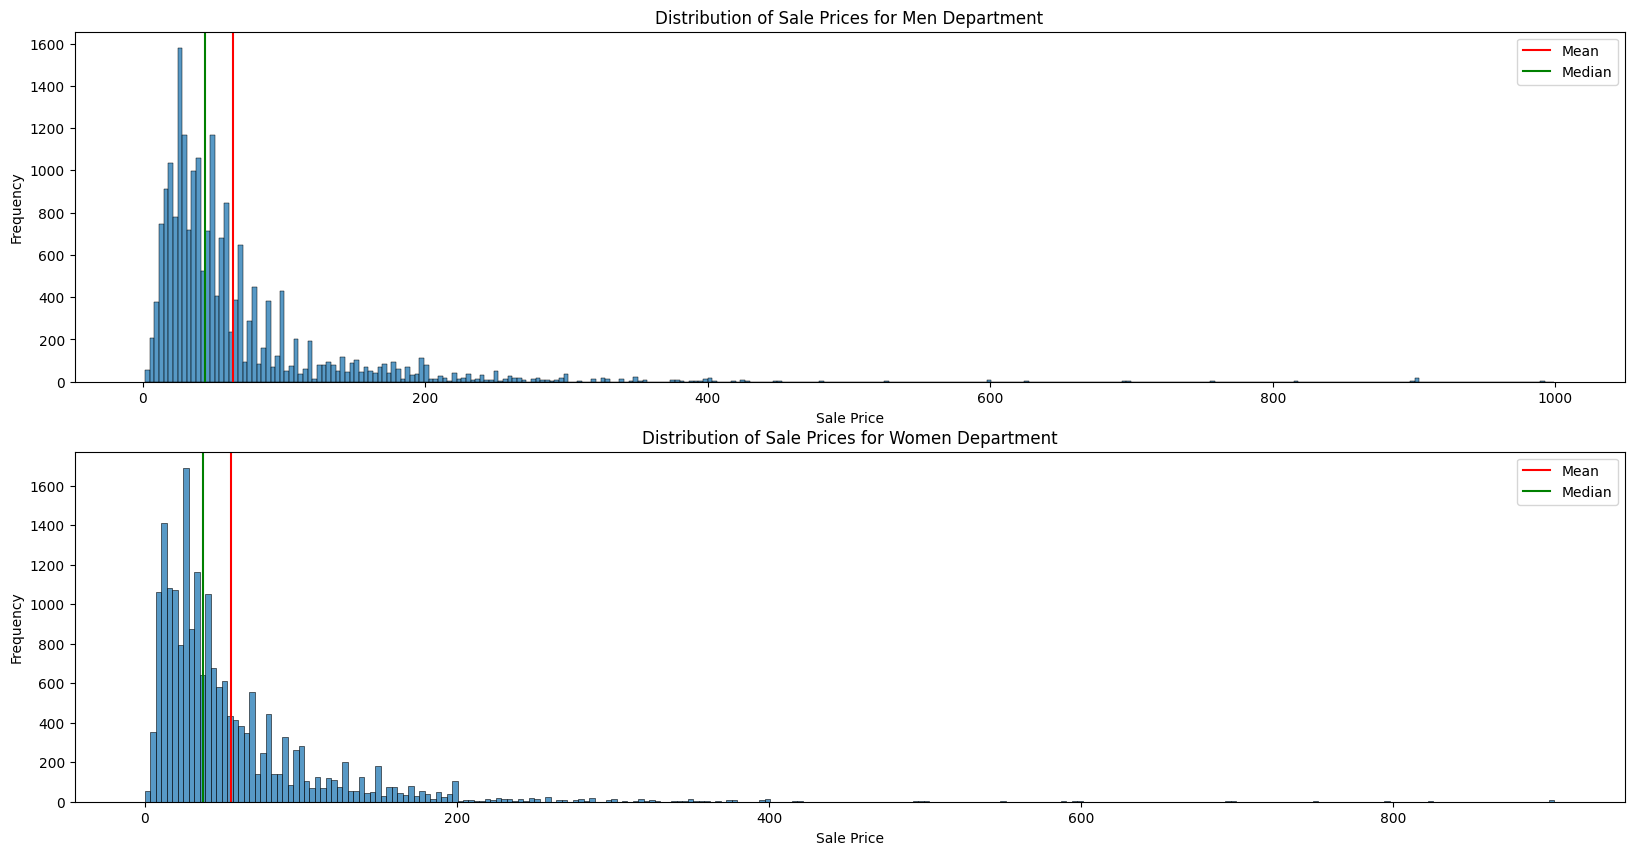

Mean for men department: 63.487953698735076
Mean for women department: 55.28580725881212


In [15]:
#plot untuk menampilkan distribusi harga penjualan berdasarkan produk department = men
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.histplot(data[data.product_department == 'Men'].sale_price)
plt.axvline(data[data.product_department == 'Men'].sale_price.mean(), color='r', label = 'Mean')
plt.axvline(data[data.product_department == 'Men'].sale_price.median(), color='g', label = 'Median')
plt.legend()
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices for Men Department')

#plot untuk menampilkan distribusi harga penjualan berdasarkan produk department = women
plt.subplot(2,1,2)
sns.histplot(data[data.product_department == 'Women'].sale_price)
plt.axvline(data[data.product_department == 'Women'].sale_price.mean(), color='r', label = 'Mean')
plt.axvline(data[data.product_department == 'Women'].sale_price.median(), color='g', label = 'Median')
plt.legend()
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices for Women Department')
plt.show()

#Menampilkan rata rata penjualan dari setiap product department
print(f"Mean for men department: {data[data.product_department == 'Men'].sale_price.mean()}")
print(f"Mean for women department: {data[data.product_department == 'Women'].sale_price.mean()}")

Visualisasi ini menampilkan distribusi harga jual produk dalam departemen Men dan Women. Dari visualisasi tersebut, dapat dilihat perbedaan rata rata harga antara kedua departemen, untuk department Men rata rata harga penjualan sebesar $63.5 sedangkan untuk departmen women rata rata harga penjualan sebesar $55.3 dimana pebandingan tersebut tidak terlalu signifikan jika dilihat secara sekilas, namun hal ini perlu dilakukan uji hipotesis apakah perbedaan ini signifikan atau tidak.

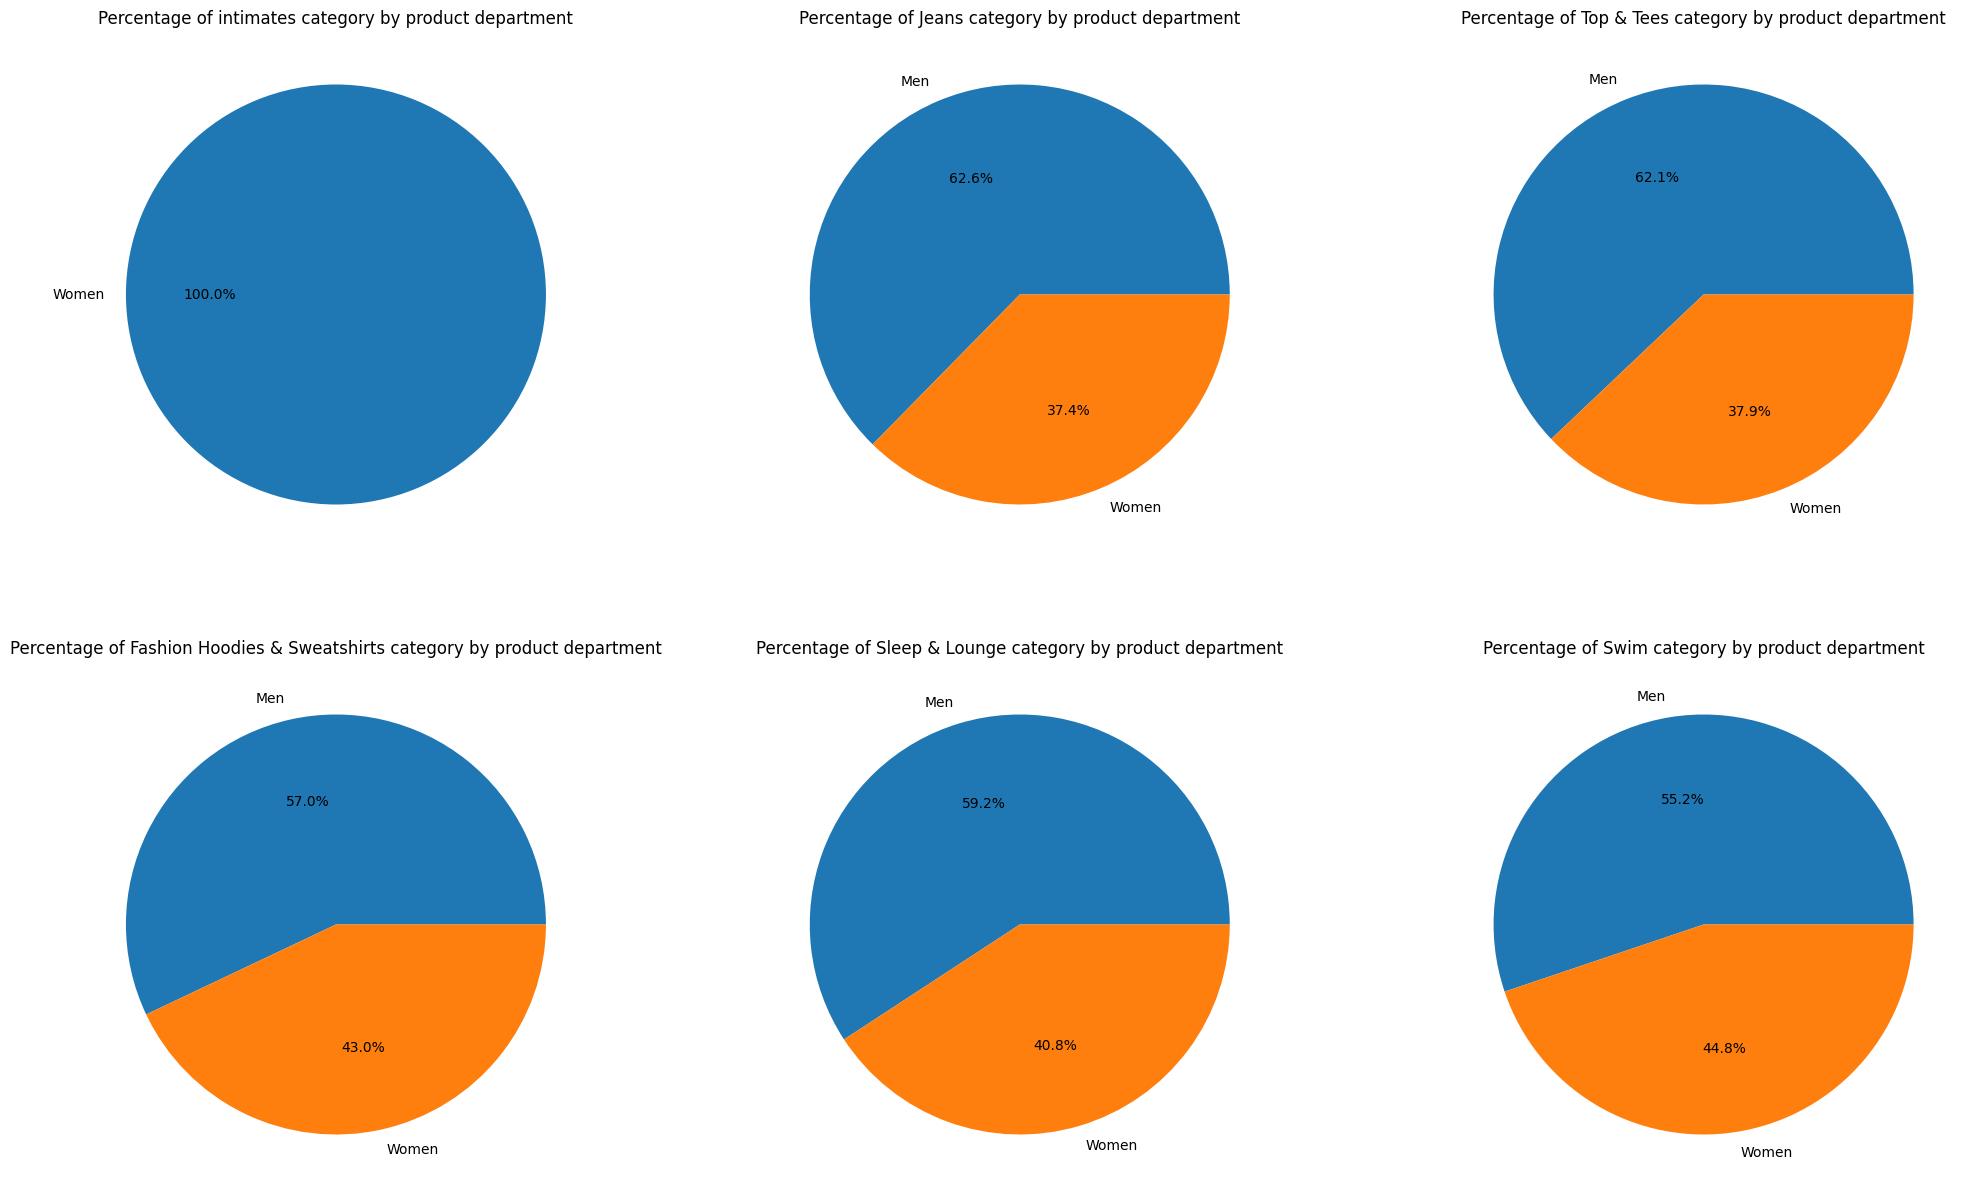

In [17]:
#plot untuk menampilkan persentase dari 6 produk terbanyak berdasarkan product department
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.pie(data[data.product_category == 'Intimates'].product_department.value_counts(), labels= data[data.product_category == 'Intimates'].product_department.value_counts().index, autopct = '%1.1f%%')
plt.title('Percentage of intimates category by product department')

plt.subplot(2,3,2)
plt.pie(data[data.product_category == 'Jeans'].product_department.value_counts(), labels= data[data.product_category == 'Jeans'].product_department.value_counts().index, autopct = '%1.1f%%')
plt.title('Percentage of Jeans category by product department')

plt.subplot(2,3,3)
plt.pie(data[data.product_category == 'Tops & Tees'].product_department.value_counts(), labels= data[data.product_category == 'Tops & Tees'].product_department.value_counts().index, autopct = '%1.1f%%')
plt.title('Percentage of Top & Tees category by product department')

plt.subplot(2,3,4)
plt.pie(data[data.product_category == 'Fashion Hoodies & Sweatshirts'].product_department.value_counts(), labels= data[data.product_category == 'Fashion Hoodies & Sweatshirts'].product_department.value_counts().index, autopct = '%1.1f%%')
plt.title('Percentage of Fashion Hoodies & Sweatshirts category by product department')

plt.subplot(2,3,5)
plt.pie(data[data.product_category == 'Sleep & Lounge'].product_department.value_counts(), labels= data[data.product_category == 'Sleep & Lounge'].product_department.value_counts().index, autopct = '%1.1f%%')
plt.title('Percentage of Sleep & Lounge category by product department')

plt.subplot(2,3,6)
plt.pie(data[data.product_category == 'Swim'].product_department.value_counts(), labels= data[data.product_category == 'Swim'].product_department.value_counts().index, autopct = '%1.1f%%')
plt.title('Percentage of Swim category by product department')

plt.show()

produk dengan kategori intimates pada dataset ini diperuntukan untuk wanita terbukri pada pie chart bahwa 100% produk ini adalah produk wanita, sedangkan kategori Jeans, Top & Tees, Fashion Hoodies & Sweatshirts, Sleep & Lounge, Swim di dominasi oleh produk untuk pria.

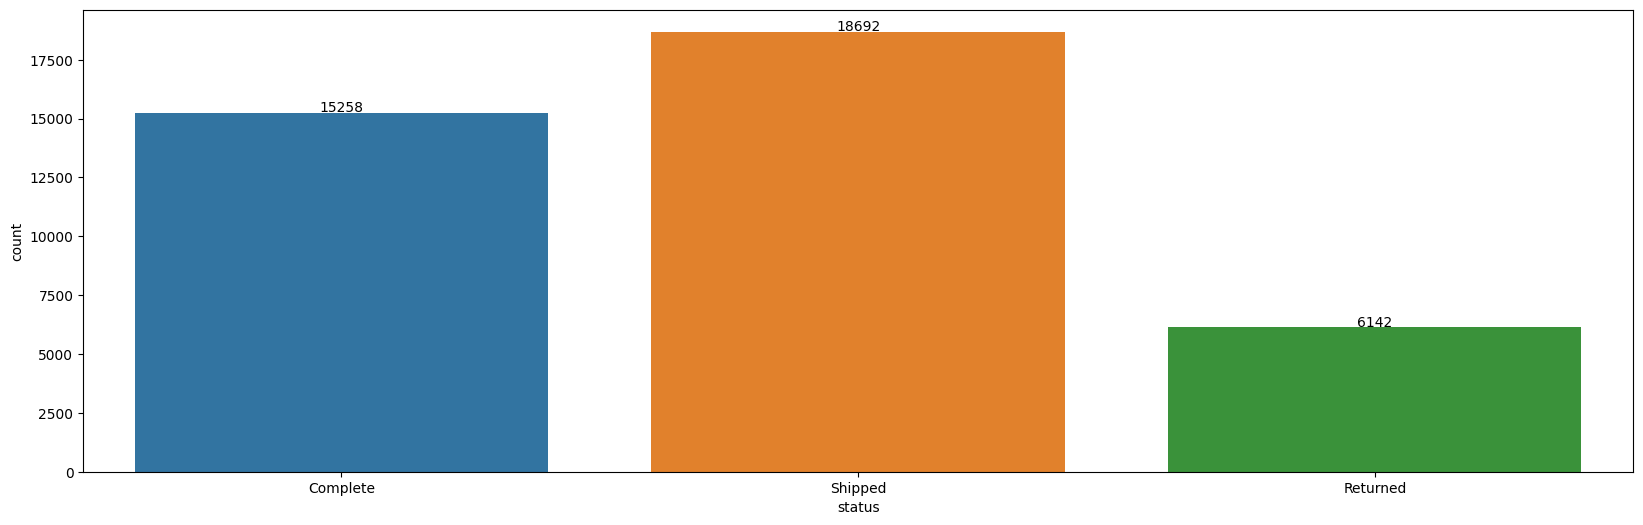

In [18]:
#plot untuk menampilkan perbandingan dari setiap status
plt.figure(figsize=(20,6))
fig = sns.countplot(x=data.status)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")

Status paling banyak yang sedang terjadi adalah shipped atau sedang proses pengiriman dengan 18692 total pengiriman, dan 15258 berstatus complete namun dari transaksi yang berstatus complete ini terdapat 6142 yang mengalami returned, ini disebabkan oleh beberapa faktor diantaranya sperti barang tidak sesuai, barang rusak, dll.

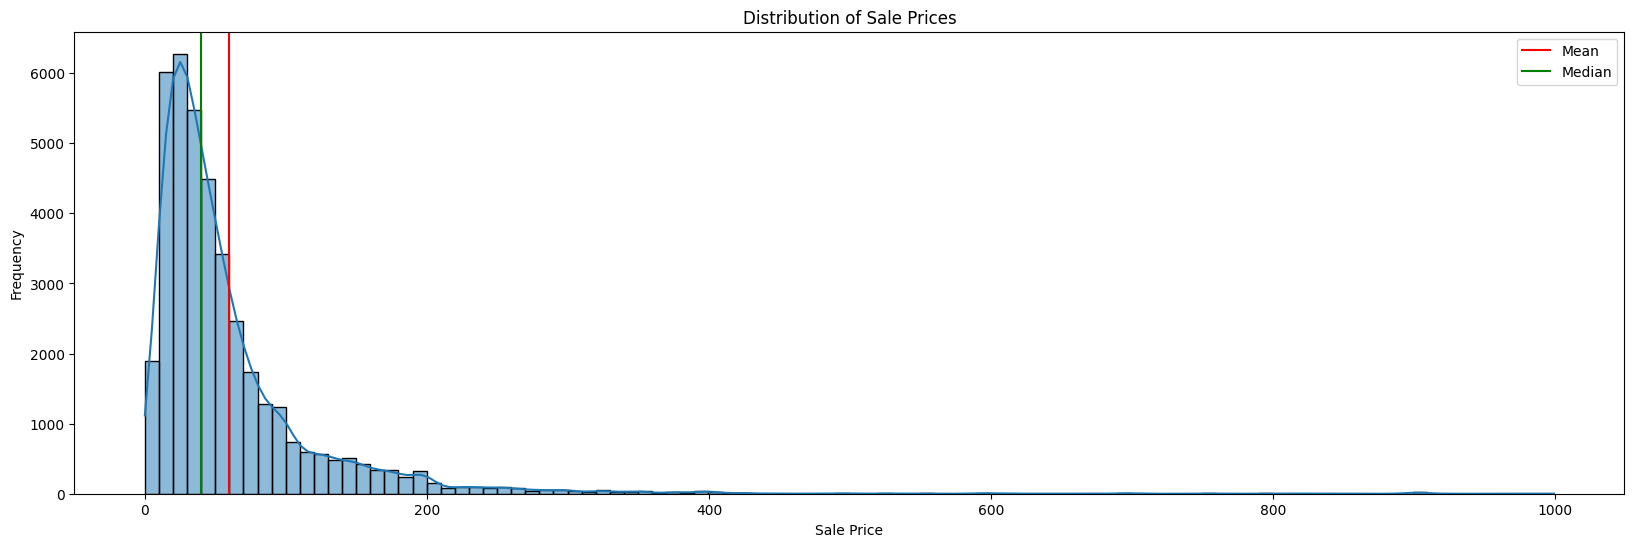

skewness : 4.651339766390676
mean : 59.432707097613836
median : 39.9900016784668
mode : 25.0


In [88]:
#plot untuk menampilkan distribusi harga penjualan
plt.figure(figsize=(20,6))
sns.histplot(x=data.sale_price, bins=100, kde=True)
plt.axvline(data.sale_price.mean(), color='r', label = 'Mean')
plt.axvline(data.sale_price.median(), color='g', label = 'Median')
plt.legend()
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()

print(f'skewness : {data.sale_price.skew()}')
print(f'mean : {data.sale_price.mean()}')
print(f'median : {data.sale_price.median()}')
print(f'mode : {data.sale_price.mode()[0]}')

dari histogram diatas kebanyakan harga jual berkisar antara $20 sampai $30 dengan jumlah lebih dari 6000 produk,rata rata dari harga penjualan ini adalah $59 

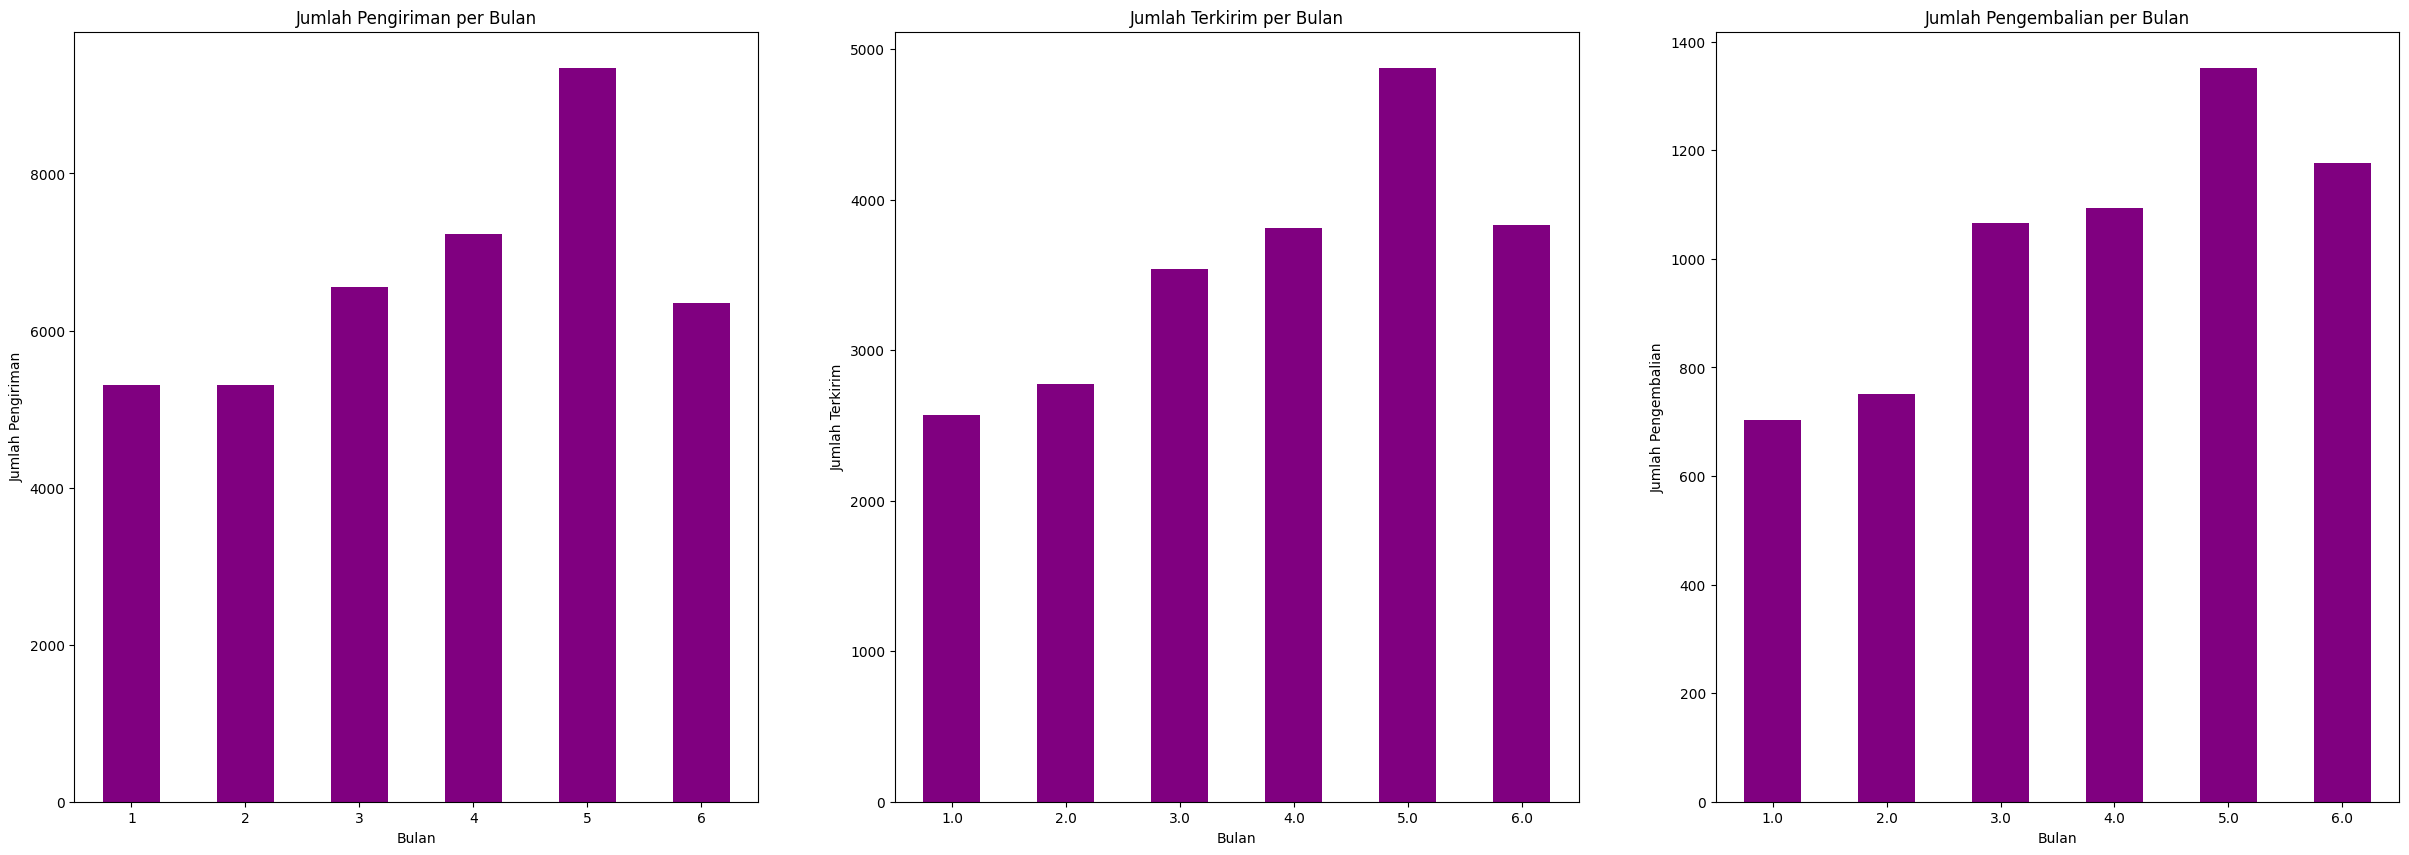

Number of Shipped: 40092
Number of Delivered: 21400
Number of Returned: 6142


In [20]:
#plot untuk menampilkan jumlah pengiriman, terkirim dan pengembalian berdasarkan bulan
plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
data.groupby(data.shipped_at.dt.month)['inventory_item_id'].count().plot(kind='bar', color='purple')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengiriman')
plt.title('Jumlah Pengiriman per Bulan')
plt.xticks(rotation=0)

plt.subplot(1,3,2)
data.groupby(data.delivered_at.dt.month)['inventory_item_id'].count().plot(kind='bar', color='purple')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Terkirim')
plt.title('Jumlah Terkirim per Bulan')
plt.xticks(rotation=0)

plt.subplot(1,3,3)
data.groupby(data.returned_at.dt.month)['inventory_item_id'].count().plot(kind='bar', color='purple')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengembalian')
plt.title('Jumlah Pengembalian per Bulan')
plt.xticks(rotation=0)

plt.show()
print(f'Number of Shipped: {data.shipped_at.notna().sum()}')
print(f'Number of Delivered: {data.delivered_at.notna().sum()}')
print(f'Number of Returned: {data.returned_at.notna().sum()}')

dari grafik diatas terlihat bahwa jumlah pengiriman meningkat dari bulan ke 3 sampai bulan ke 5 begitu juga dengan jumlah terkirim dan jumlah pengembalian, terlihat pola dimana jumlah pengiriman meningkat maka jumlah terkirim dan pengembalian juga meningkat, ini membukatikan bahwa produk yang diterima oleh customer memiliki ketidak samaan produk, tidak sesuai dengan ekspetasi customer atau memiliki kecacatan dalam produk sehingga customer mengambil keputusan untuk mengembalikan barang yang sudah diterima.

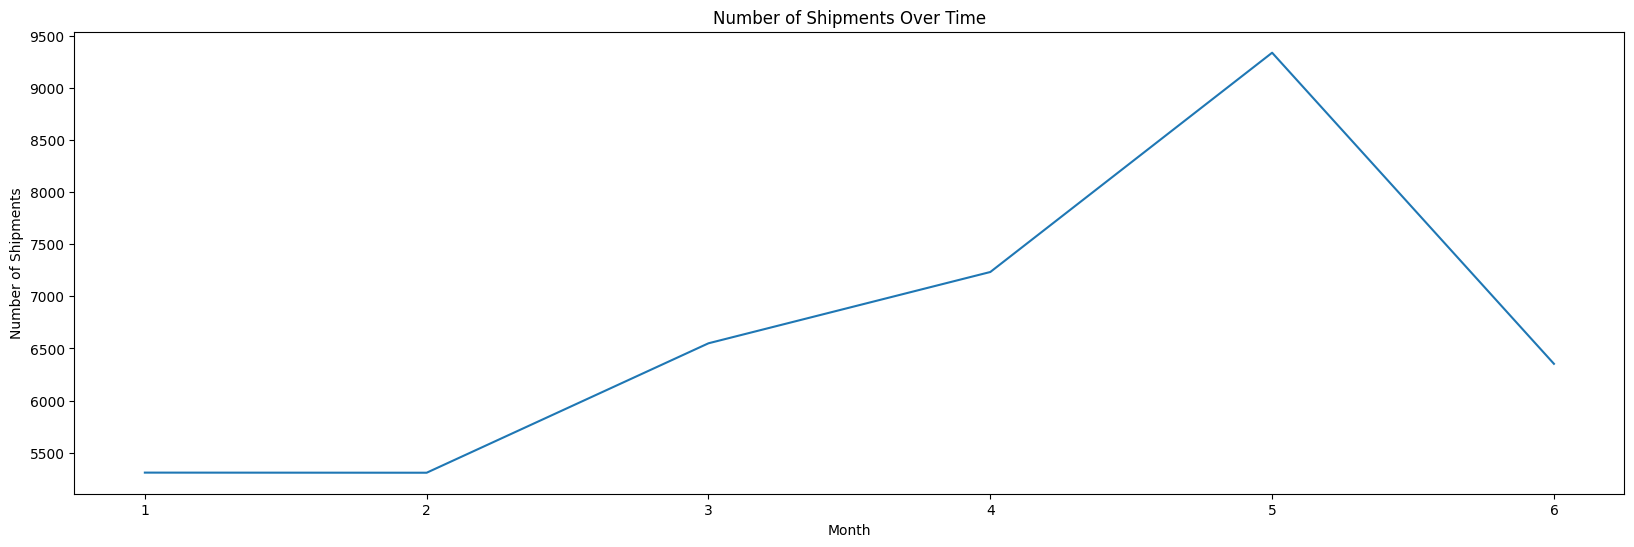

In [22]:
#plot untuk menampilkan peningkatan atau penurunan dari pengiriman setiap bulan
plt.figure(figsize=(20,6))
plt.plot(data.groupby(data.shipped_at.dt.month)['inventory_item_id'].count())
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.title('Number of Shipments Over Time')
plt.show()

Terdapat peningkatan jumlah pengiriman pada bulan ke 2 sampai bulan ke 5, namun terdapat peningkatan yang drastis pada bulan ke 5 ini disebabkan karena jumlah pembelian dari tanggal 1 sampai tanggal 31 total produk terjual berada di range 232 sampai 412 di setiap harinya, pembelian yang meningkat ini bisa dibeabkan karena musim semi di US.

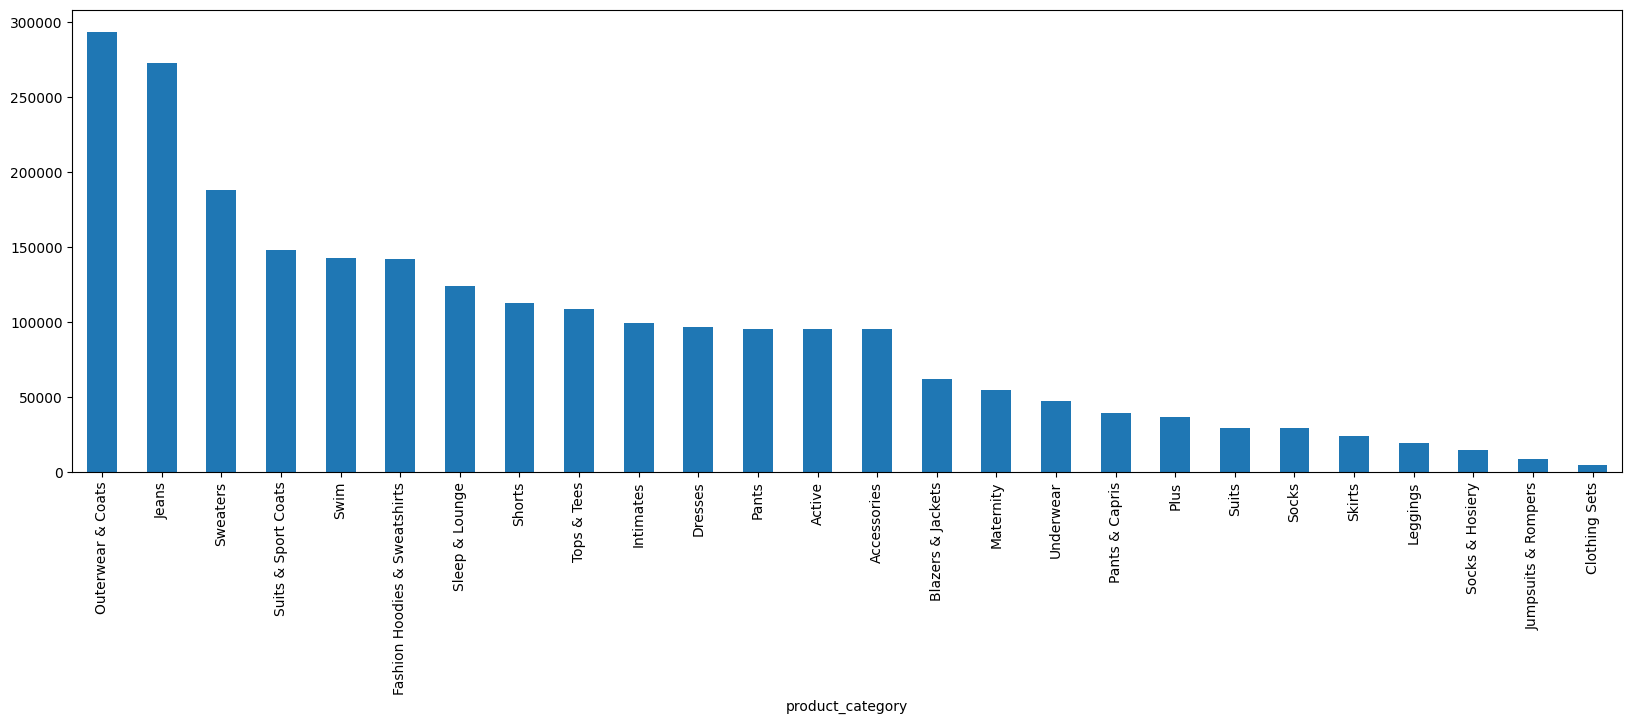

In [108]:
plt.figure(figsize=(20,6))
data.groupby(data.product_category).sale_price.sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

Kategori dengan total penjualan paling tinggi adalah Outerwear & Coats, dengan total penjualan mencapai hampir 300000. Sedangkan produk dengan penjualan terbesar kedua adalah Jeans, dengan total penjualan hampir mencapai 180000.

In [23]:
#membuat kolom baru untuk menyimpan selisih antara produk terkirim sampai diterima oleh konsumen
data['shipping_time'] = (data['delivered_at'] - data['shipped_at']).dt.days

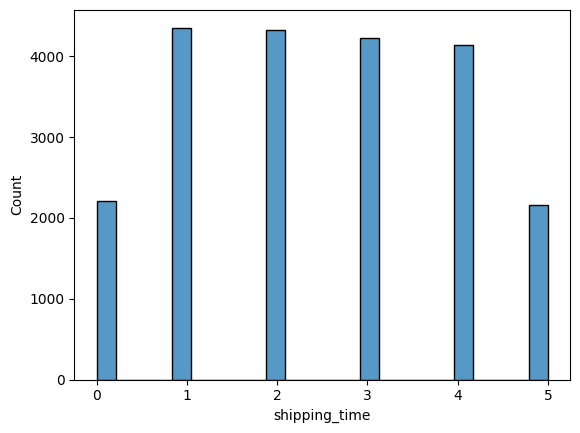

Mean:2.4767289719626167
Mode: 1.0


In [40]:
#menampilkan distribusi dari lama produk yang dikirim sampai diterima oleh konsumen
sns.histplot(data.shipping_time)
plt.show()
print(f'Mean:{data.shipping_time.mean()}')
print(f'Mode: {data.shipping_time.mode()[0]}')

waktu yang dibutuhkan dari produk dikirim sampai diterima oleh customer rata rata 2 sampai 3 hari, namun kebanyakan produk dapat diterima oleh customer dalam waktu 1 hari.

## Hypothesis Testing

H0 (Hipotesis Nol): Tidak ada perbedaan signifikan antara rata-rata sale price antara produk untuk pria dan produk untuk wanita.

H1 (Hipotesis Alternatif): Terdapat perbedaan signifikan antara rata-rata sale price antara produk untuk pria dan produk untuk wanita.

In [31]:
#membuat variabel baru untuk menyimpan data dari setiap product department
men_sale_price = data[data.product_department == "Men"].sale_price
women_sale_price = data[data.product_department == "Women"].sale_price

In [94]:
#membuat variabel untuk menyimpan significant treshold
significant_threshold = 0.05

In [96]:
# melakukan uji t-test
t_stat, p_value = stats.ttest_ind(men_sale_price, women_sale_price)
# menampilkan t-stat dan p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 12.658538431142642
p-value: 1.1796015261111351e-36


In [97]:
#membuat looping 
if p_value <= significant_threshold:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Dari hasil uji hipotesis menggunakan two sample t-test dengan significant threshold sebesar 0.05, p-value yang didapatkan adalah 1.1796015261111351e-36 (mendekati 0), karena p-value lebih kecil dari significant threshold maka pada uji hipotesis ini berhasil menolak H0 karena memiliki cukup bukti untuk menolak hipotesis tersebut, sehingga dapat disimpulkan bahwa rata-rata sale price antara Man dan Woman Significant

In [35]:
#membuat sample dari setiap product department sebanyak 10000
man_pop = np.random.normal(men_sale_price.mean(), men_sale_price.std(), 10000)
woman_pop = np.random.normal(women_sale_price.mean(), women_sale_price.std(), 10000)

In [36]:
#menentukan confidence interval untuk masing masing product department
ci_men = stats.norm.interval(0.95, loc=men_sale_price.mean(), scale=men_sale_price.std())
ci_women= stats.norm.interval(0.95, loc=women_sale_price.mean(), scale=women_sale_price.std())

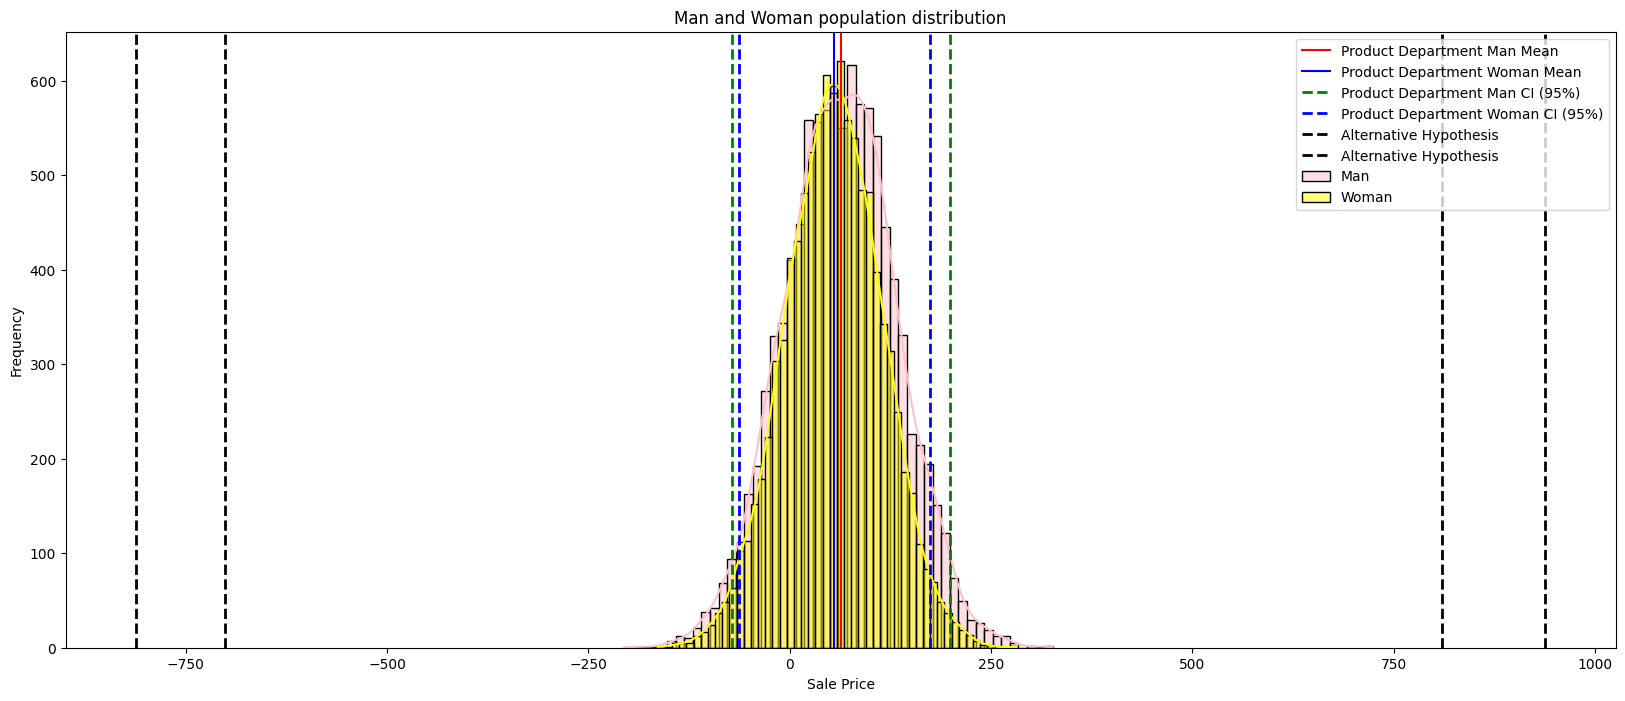

In [37]:
#plot untuk menampilkan pembuktian terhadap hipotesis testing
plt.figure(figsize=(20, 8))
sns.histplot(man_pop, bins=50, label='Man', color='pink', kde=True)
sns.histplot(woman_pop, bins=50, label='Woman', color='yellow', kde=True)
plt.axvline(x=man_pop.mean(), color='red', label='Product Department Man Mean')
plt.axvline(x=woman_pop.mean(), color='blue', label='Product Department Woman Mean')
plt.axvline(ci_men[1], color='green', linestyle='dashed', linewidth=2, label='Product Department Man CI (95%)')
plt.axvline(ci_men[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci_women[1], color='blue', linestyle='dashed', linewidth=2, label='Product Department Woman CI (95%)')
plt.axvline(ci_women[0], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(man_pop.mean()+t_stat*man_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(man_pop.mean()-t_stat*man_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(woman_pop.mean()+t_stat*woman_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(woman_pop.mean()-t_stat*woman_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.title('Man and Woman population distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Conclusion

Berdasarkan analisis data yang sudah dilakukan, terdapat beberapa insight menarik yang dapat diperoleh. Pertama, dari dataset tersebut terlihat bahwa produk dengan kategori Intimates, Jeans, dan Tops & Tees adalah produk yang paling banyak terjual. Jumlah penjualan produk-produk ini jauh lebih tinggi dibandingkan dengan kategori lainnya seperti Clothing Sets. Selanjutnya, pada rentang bulan Januari hingga Juni tahun 2023 di Amerika Serikat, terjadi peningkatan yang signifikan dalam pembelian produk seperti Intimates, Tops & Tees, Jeans, Sweaters, Shorts, Swim, dan Fashion Hoodies & Sweatshirts. Hal ini mungkin disebabkan oleh beberapa faktor seperti musim semi yang membuat orang mencari pakaian yang lebih ringan dan tren mode baru yang dirilis pada awal tahun.

Selain itu, terdapat perbedaan yang menarik antara produk untuk pria dan wanita dalam dataset tersebut. Jumlah produk untuk pria ternyata lebih banyak daripada produk untuk wanita. Meskipun perbedaannya tidak begitu signifikan dalam jumlah, namun ini menunjukkan preferensi pembelian yang berbeda antara kedua kelompok tersebut.

Selanjutnya, kategori produk Intimates dalam dataset tersebut secara khusus ditujukan untuk wanita. Di sisi lain, kategori Jeans, Tops & Tees, Fashion Hoodies & Sweatshirts, Sleep & Lounge, dan Swim lebih didominasi oleh produk untuk pria. Hal ini mengindikasikan perbedaan preferensi dan permintaan pasar antara pria dan wanita dalam hal jenis produk yang mereka beli.

Lalu, kategori dengan total penjualan terbesar adalah Outerwear & Coats, dengan total penjualan mencapai hampir $300000. Sementara itu, Jeans menjadi produk dengan penjualan terbesar kedua, dengan total penjualan hampir mencapai $180000.

Selain itu, melalui analisis terhadap status transaksi, ditemukan bahwa status yang paling umum adalah shipped atau sedang dalam proses pengiriman, diikuti oleh status complete. Namun, ada juga sejumlah produk yang mengalami pengembalian returned". Hal ini menunjukkan adanya variasi atau kecacatan dalam produk yang diterima oleh pelanggan sehingga mengakibatkan pengembalian.


Dalam konteks waktu pengiriman, terlihat bahwa rata-rata waktu yang dibutuhkan dari pengiriman hingga diterimanya produk oleh pelanggan adalah sekitar 2 hingga 3 hari. Namun, sebagian besar produk dapat diterima dalam waktu 1 hari. Ini menunjukkan tingkat efisiensi dalam proses pengiriman yang relatif cepat.

Terakhir, hasil uji hipotesis menunjukkan adanya perbedaan yang signifikan antara rata-rata harga penjualan produk untuk pria dan wanita. Hal ini menunjukkan bahwa ada perbedaan dalam nilai harga antara produk yang ditujukan untuk pria dan wanita dalam dataset tersebut.

Secara keseluruhan, insight yang didapat ini mengungkapkan pola pembelian yang berkaitan dengan musim, tren mode, perbedaan preferensi antara pria dan wanita, serta efisiensi proses pengiriman. 

rekomendasi yang dapat diberikan kepada thelook ecommerce adalah:
1. perusahaan perlu memperkuat stok dan promosi untuk kategori produk yang paling banyak terjual, seperti Intimates, Jeans, dan Tops & Tees, Outerwear & Coats karena produk produk ini selalu dibutuhkan pada setiap musim, terutama di 2 quarter pertama (januari - juni) dan juga memberikan total penjualan yang tinggi.
2. perusahaan perlu memperbaiki kualitas produk dan layanan pelanggan untuk mengurangi jumlah pengembalian dan meningkatkan kepuasan pelanggan.

In [99]:
data.to_csv('data_cleaned.csv',index=False)